In [1]:
#pip install tensorflow transformers  tf-keras pandas matplotlib seaborn 
from transformers import pipeline
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


2024-04-18 14:31:03.458611: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-18 14:31:03.462516: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-18 14:31:03.519150: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-18 14:31:04.576417: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def load_classifier():
    classifier = pipeline("text-classification", 
                          model="j-hartmann/emotion-english-distilroberta-base", 
                          return_all_scores=False) 
    return classifier

In [3]:
classifier = load_classifier()

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/329M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at j-hartmann/emotion-english-distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/home/ucloud/.local/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [4]:
def load_data(filepath):
    data_emotions_path = (filepath).split("/")[-1].split(".")[0] + "_with_emotion_scores.csv"
    data_in = pd.read_csv(filepath)
    data_emotions = pd.read_csv(filepath)
    data_emotions[["emotion_label", "emotion_score"]] = ""
    return data_in, data_emotions, data_emotions_path

In [5]:
data_in, data_emotions, data_emotions_path = load_data("../in/GoT-scripts/Game_of_Thrones_Script.csv")

In [12]:
def emotion_classifier(data_in, data_emotions, classifier, data_emotions_path):
    for sent in range(len(data_in["Sentence"])):
        sentence = data_in["Sentence"][sent]
        if type(sentence) == str:
            emotion_label = classifier(sentence)[0]["label"]
            emotion_score = classifier(sentence)[0]["score"]
            data_emotions.loc[sent, "emotion_label"] = emotion_label
            data_emotions.loc[sent, "emotion_score"] = emotion_score
    data_emotions.to_csv(emotions_path)
    return print("Emotion scores and labels for each sentence in the dataset have been saved to the outfolder")

In [ ]:
emotion_classifier(data_in, data_emotions, classifier, data_emotions_path)

In [21]:
data_test = data_emotions.loc[0:8000]
data_test["id"] = range(0,8001)

In [104]:
#keep only season and emotion label 
data_em_plot = data_test.loc[:, ["Season", "emotion_label"]]
#Create new df with value counts for each emotion for each season 
new = data_em_plot.value_counts().reset_index().rename(columns={"index": "value", 0: "counts"})
#count total number of lines per season 
new.loc[new["Season"] == "Season 1", "count"].sum()

In [112]:
for season in 
new.loc[new["Season"] == "Season 1", "count"].sum()

3179

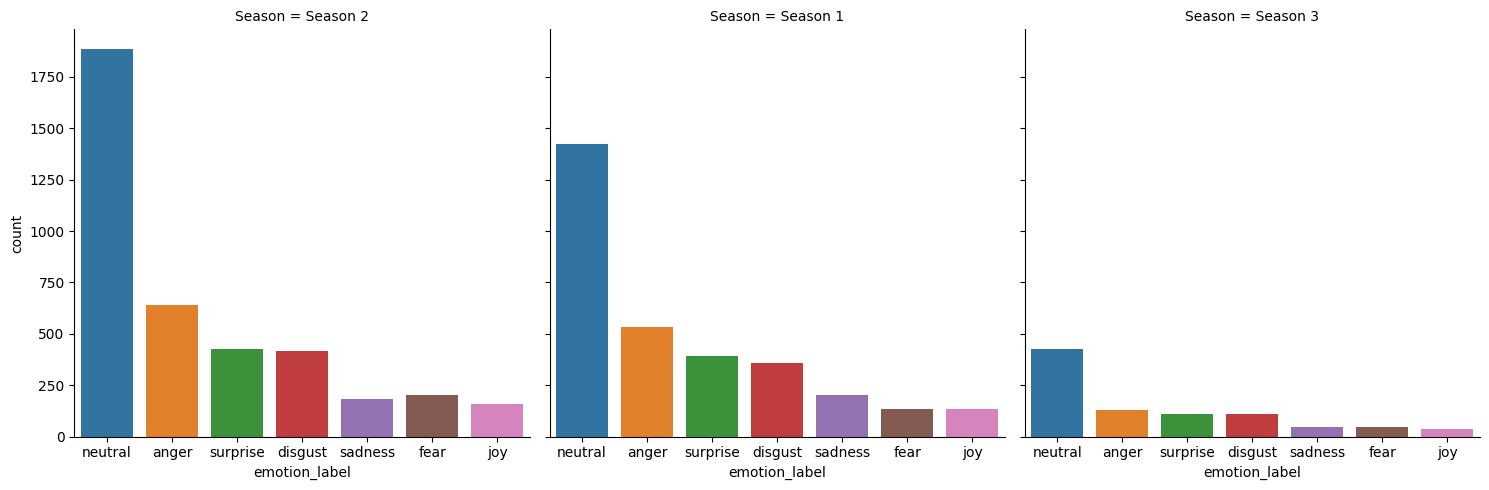

In [43]:
sns.catplot(data_em_plot_c, 
            x= "emotion_label", 
            y = "count",
            hue = "emotion_label", 
            kind = "bar", 
            col = "Season", 
            #col_wrap = 4,
             )

In [ ]:
def season_plot(data_emotions_path):
    data_emotions = pd.read_csv(data_emotions_path)
    g = sns.FacetGrid(data_emotions, col="Season", hue = "emotion_label")
    g.map(sns.catplot, data_emotions, x = "emotion_label", 
                                      kind = "count", 
                                      pallette = "pastel")

In [44]:
data_emotions_plot = pd.DataFrame(columns=["emotion_label", "Season", "n_lines", "rel_freq"])

In [55]:
data_emotions_plot = data_emotions.loc[:, ["Season", "emotion_label"]]

In [70]:
val = pd.DataFrame(data_emotions_plot.value_counts())

In [71]:
val

,,count
Season,emotion_label,
Season 7,,2442
Season 6,,2129
Season 2,neutral,1887
Season 3,neutral,1729
Season 4,neutral,1591
Season 8,,1466
Season 5,neutral,1447
Season 1,neutral,1422
Season 2,anger,642


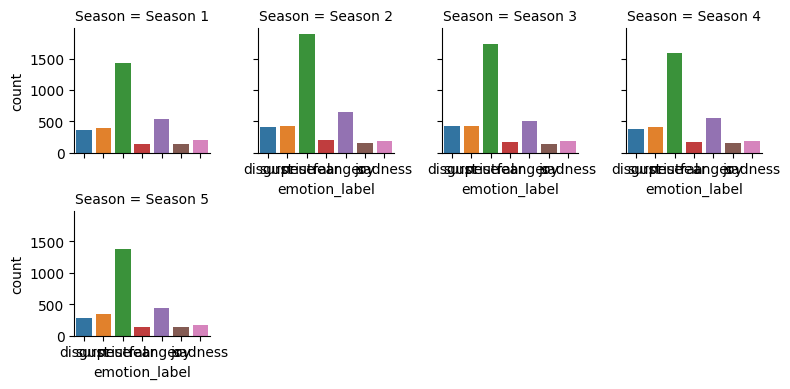

In [41]:
sns.catplot(data_emotions.loc[0:17000], 
                x= "emotion_label", 
                hue = "emotion_label", 
                kind = "count", 
                col = "Season", 
                col_wrap = 4, 
                height = 2)
#g.set_axis_labels("", "count")


In [11]:
def load_data(filepath):
    data_emotions_path = (filepath).split("/")[-1].split(".")[0] + "_with_emotion_scores.csv"
    data_in = pd.read_csv(filepath)
    data_emotions = pd.read_csv(filepath)
    data_emotions[["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"]] = ""
    return data_in, data_emotions, data_emotions_path

In [6]:
def emotion_classifier(data_in, data_emotions, classifier, data_emotions_path):
    for sent in range(len(data_in["Sentence"])):
        sentence = data_in["Sentence"][sent]
        if type(sentence) == str:
            emotion_dicts = classifier(sentence)[0]
            emotion_scores = []
            for dict in emotion_dicts:
                score = dict["score"]
                emotion_scores = emotion_scores + [score]
            data_emotions.loc[sent, "anger":"surprise"] = emotion_scores
    data_emotions.to_csv(emotions_path)
    return print("Emotion scores for each sentence in the dataset have been saved to the outfolder")

In [7]:
classifier = load_classifier()
data_in, data_out = load_data("../in/GoT-scripts/Game_of_Thrones_Script.csv")
data_out = emotion_classifier(data_in, classifier, data_out, "../out/emotion_scores.csv")

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at j-hartmann/emotion-english-distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
/home/ucloud/.local/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [28]:
#read in saved df 
data_emotions = pd.read_csv("../out/emotion_scores.csv", index_col=0)
#make long format to use in plots
data_emot_long = pd.melt(data_emotions, id_vars=(['Sentence', 'Season', 'Episode']), value_vars=["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"])

In [ ]:
#inspect data
data_emot_long["variable"].value_counts()
data_emotions.describe(include="all")

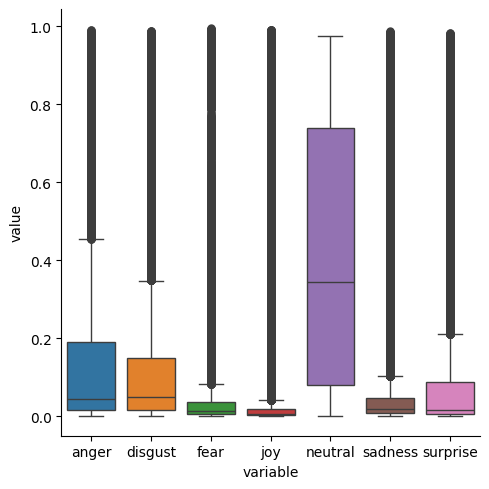

In [38]:
#boxplot
sns.catplot(data_emot_long, x="variable", y="value", kind="box", hue = "variable")
#plt.savefig("../out/boxplot_wo_neutral.png")


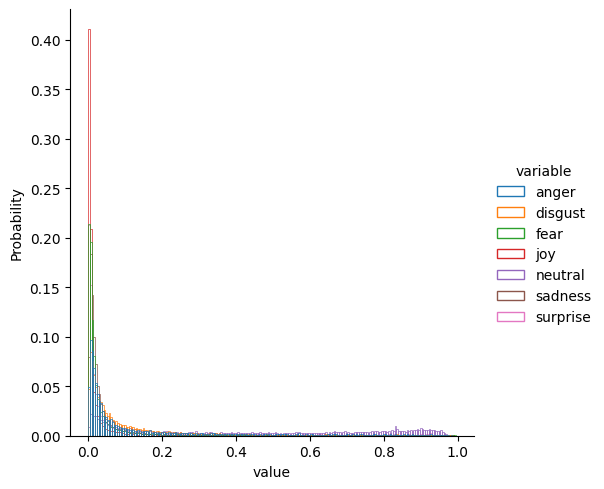

In [37]:
#sns.displot(data_emot_long, x="value", col = "Season", hue = "variable", kde=True, stat="density", common_norm=False)
sns.displot(data_emot_long, x="value",hue = "variable", kde=False, stat="probability", fill = False, common_norm = False)

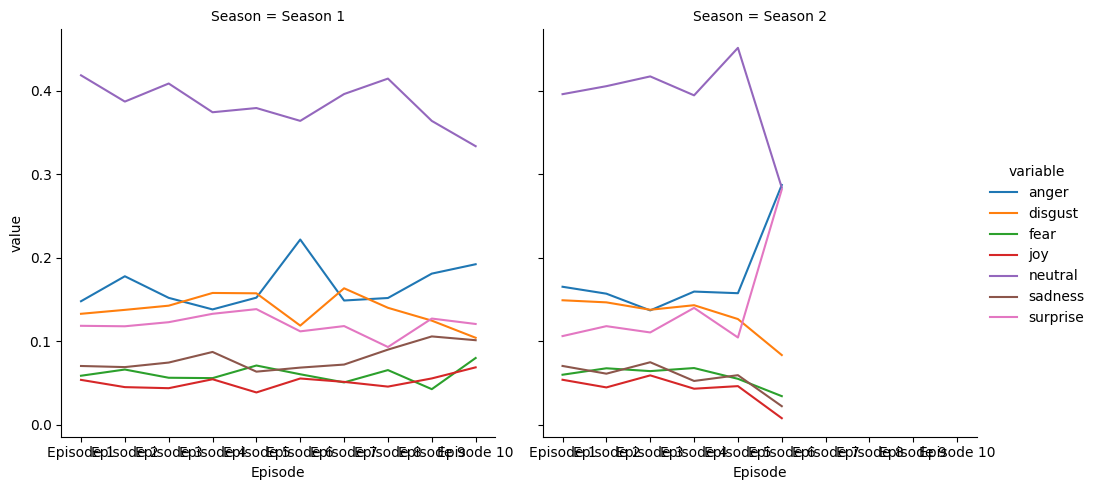

In [66]:
#sns.displot(data_long, x="value", col = "Season", hue = "variable", kde=True)
#sns.displot(data_long, x="value", col = "Season", hue = "variable", kind = "kde", bw_adjust = .2)
#sns.displot(data_long, x="value", hue="variable", col = "Season", multiple="stack")
#sns.catplot(data_long, x="variable", y="value", kind="box", col = "Season")
#sns.catplot(data_long, x="variable", y="value", kind="boxen", col = "Season", hue = "variable")

sns.relplot(x="Episode", y="value", hue="variable", kind = "line", errorbar = None, col = "Season", data=data_long)